# Exercise: Implement the ReLU Activation Function

In this exercise, you'll implement one of the most widely used activation functions in deep learning — **ReLU**, or **Rectified Linear Unit**.

ReLU introduces **non-linearity** into the neural network while being simple and computationally efficient.

Let’s dive in!

## What Is ReLU?

The ReLU activation function is defined as:

$ A = ReLU(x) = max(0, x)$

This means:
- If the input `x` is **positive**, it returns `x`.
- If the input `x` is **negative or zero**, it returns `0`.


## Import Packages

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import inspect

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Task: Create ReLU function

Complete the function `relu(x)` to return the ReLU of `x`.

Your function should:
- Accept either a **scalar**, **NumPy array**, or **Tensor**
- Replace all negative values with 0.0 (yes, specifically 0.0 and not 0. This will is important for later as we train a simple model ensuring all scalar values match data types)
- Return a scalar or array (same shape as input)

Hint: Use **TensorFlow's** built-in `maximum()` function. While using NumPy's `maximum()` function will work very similarly, we want to use TensorFlow's version for a later exercise in this notebook.


In [12]:
def my_relu(x):
    """
    Compute the ReLU (Rectified Linear Unit) of x.

    Arguments:
    x -- A scalar or numpy array of any shape

    Returns:
    ReLU applied element-wise to x
    """
    result = tf.maximum(0.0, x) # Replace with your code
    return result

In [ ]:
def test_relu():
    """
    Test the relu function with scalar inputs.
    """
    # Test relu function with negative values
    assert my_relu(-5) == 0, "Scalar negative input test failed. Expected 0 for negative input."
    # Test relu function with positive values
    assert my_relu(3) == 3, "Scalar positive input test failed. Expected x for positive input for relu(x)."
    # Test relu function with zero
    assert my_relu(0) == 0, "Scalar zero input test failed. Expected 0 for zero input."

    print("Scalar tests passed!")

def test_relu_array():
    """
    Test the relu function with numpy array inputs.
    """
    input_array = np.array([-1, 0, 2])
    expected_output = np.array([0, 0, 2])
    try:
        np.testing.assert_array_equal(my_relu(input_array), expected_output)
        print("Array test passed!")
    except AssertionError:
        raise AssertionError("NJumPy array test failed: expected [0, 0, 2] from my_relu([-1, 0, 2]) as a NumPy array")
    
def test_tensor():
    """
    Test the relu function with numpy array inputs.
    """
    input_tensor = tf.constant([-1.0, 0.0, 2.0])
    expected_output = tf.constant([0.0, 0.0, 2.0])
    try:
        np.testing.assert_array_equal(my_relu(input_tensor), expected_output)
        print("Array test passed!")
    except AssertionError:
        raise AssertionError("Tensor test failed: expected [0.0, 0.0, 2.0] from my_relu([-1.0, 0.0, 2.0]) as a Tensor")
    
def test_uses_tf_maximum():
    """
    Test to ensure using tf.maximum in my_relu.
    """
    source = inspect.getsource(my_relu)
    try:
        'tf.maximum' in source
        print("Using tf.maximum test passed!")
    except Exception:
        raise AssertionError("my_relu() should use tf.maximum instead of np.maximum.")    

# Run the tests
try:
    test_relu()
    test_relu_array()
    test_tensor()
    test_uses_tf_maximum()
    print("All tests passed!")
except AssertionError as err:
    print(err)


Scalar tests passed!
Array test passed!
Array test passed!
Using tf.maximum test passed!
All tests passed!


### When you see the message "All tests passed!", you are good to move on!

## Task: Plot ReLU function on a Graph.

Plot the ReLU function for values from -10 to 10.

This helps you visualize how ReLU behaves depending on the value of x.

Hint: use the code above that you wrote above to fill in the values for y!


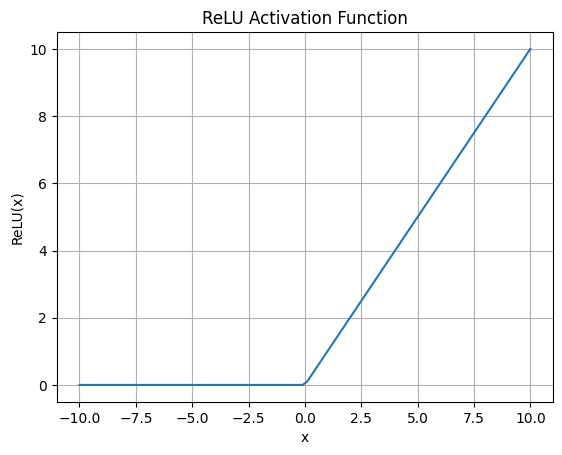

In [16]:
def plot_relu():
    """
    Plot the ReLU activation function.
    """
    x = np.linspace(-10, 10, 100)
    y = my_relu(x)# Replace with your code
    plt.plot(x, y)
    plt.title("ReLU Activation Function")
    plt.xlabel("x")
    plt.ylabel("ReLU(x)")
    plt.grid(True)
    plt.show()

plot_relu()

If run correctly, you should see a plot where the relationship between x and y is linear except for when $x < 0$, in which $y = 0$ for all of $x < 0$.

## ReLU in a Real Neural Network (Using TensorFlow)

So far, you've implemented and visualized the ReLU activation function manually.

Now let’s see how it's used in practice — inside a real neural network, trained on real data!

To do this, we’ll use **TensorFlow**, one of the most popular open-source libraries for building and training machine learning models. 

Additionally, we will use a high-level API called **Keras**, which assists with defining and training neural networks.

#### Why TensorFlow?

- TensorFlow handles low-level math (like gradients and matrix ops) for us.
- TensorFlow makes it easy to define layers, activation functions, loss functions, and optimizers.

In the code below,  build a neural network and use our custom `relu()` function as the activation function in the hidden layer.

#### Dataset: MNIST

We’ll use the **MNIST dataset** for training our neural network. **MNIST** is a dataset that contains grayscale images of handwritten digits (0–9). Each image is 28×28 pixels and we will build a classifier that correctly predicts the digit in each image.

Let’s load the data and build the model!

In [17]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images to values between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten the 28x28 images to 784-dimensional vectors
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## The Neural Network Structure

We'll build a simple neural network with:
- **Input layer**: 784 features (28×28 pixels)
- **Hidden layer**: 128 neurons with ReLU activation
- **Output layer**: 10 neurons (one per digit) with softmax activation

## Task: Incorporate ReLU into Neural Network
Set the Dense hidden layer's activation function to your custom made ReLU function.

**Hint**: Do not use activation='relu' as this defaults to Kera's relu function. 

**Hint** If you get an error saying `TypeError: my_relu() missing 1 required positional argument: 'x'`, remove the `()` from the method call.


In [19]:
# Build the model
model = Sequential([
    # Replace with your code below (after "activate=")
    Dense(128, activation=my_relu, input_shape=(784,)),  
    Dense(10, activation='softmax') 
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## What ReLU Really Does in a Neural Network

When you build a neural network and use `activation=relu`, you're telling the model:

"After the weighted sum of inputs is calculated at each neuron, apply the ReLU function to that result."


### Step-by-Step Computation

For a dense (fully connected) layer:

$Z = W \cdot X + b$

- `W`: weight matrix
- `X`: input vector
- `b`: bias vector
- `Z`: raw output (pre-activation)

Then ReLU is applied element-wise to `Z`:

$A = \text{ReLU}(Z) = \max(0, Z)$

So if the output of a neuron is **negative**, ReLU turns it into **zero**. If it's **positive**, it passes through unchanged.

### Why use ReLU?

ReLU is particularly useful because it introduces **sparsity**, where only some neurons activate for a given input (specifically positive values and not negative values). This sparsity can help neurons learn to respond to different and more specific features in data. 

Additionally, ReLU is computationally **faster** (just a single `max()` call), compared to other activation functions which can include exponential values.

### In Practice

During training (see `.fit()` below), this ReLU logic is used during every forward pass:
- Input → Linear transformation → ReLU → Next layer
- ReLU is part of what's being "trained around" as weights are updated via backpropagation.

Your `relu()` function is plugged directly into this pipeline — so every neuron in your hidden layer applies your implementation to its computed value.


In [20]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8736 - loss: 0.4556 - val_accuracy: 0.9645 - val_loss: 0.1250
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9635 - loss: 0.1246 - val_accuracy: 0.9767 - val_loss: 0.0875
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9735 - loss: 0.0869 - val_accuracy: 0.9775 - val_loss: 0.0798
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9830 - loss: 0.0570 - val_accuracy: 0.9783 - val_loss: 0.0801
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9867 - loss: 0.0454 - val_accuracy: 0.9790 - val_loss: 0.0724


## Verify Your ReLU Activation Is Used

To ensure that your custom `relu` function was correctly passed into the model, you can inspect the model's layers.

Run the following commands in the cell below to view information about the model's layers:

```python
model.layers[0].activation.__name__


In [ ]:
# Check the activation function of the first layer
model.layers[0].activation.__name__

In [ ]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

## Great job!

You have successfully trained a neural network on MNIST data using the ReLU activation function!

## Recap

- ReLU activation helps neural networks learn non-linear functions efficiently.
- It "activates" only positive values and zeroes out negatives.
- It’s the default choice for hidden layers in modern deep learning.

# Solution to exercises

## Solution: Create ReLU function

In [ ]:
def my_relu(x):
    result = tf.maximum(0.0, x)
    return result

## Solution: Plot ReLU function on a Graph.

In [ ]:
def plot_relu():
    x = np.linspace(-10, 10, 100)
    y = my_relu(x)
    plt.plot(x, y)
    plt.title("ReLU Activation Function")
    plt.xlabel("x")
    plt.ylabel("ReLU(x)")
    plt.grid(True)
    plt.show()

plot_relu()

## Solution: Incorporate ReLU into Neural Network

In [ ]:
model = Sequential([
    Dense(128, activation=my_relu, input_shape=(784,)),
    Dense(10, activation='softmax') 
])